In [1]:
# importing python libraries for analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import openpyxl
import seaborn as sns

In [2]:
# Show all columns(instead of cascading columns in the middle)
pd.set_option("display.max_columns",None)
# Don't show numbers in scientific notation
pd.set_option("display.float_format","{:.2f}".format)

In [3]:
# reading the csv and xlsx file
df_customer = pd.read_csv("QVI_purchase_behaviour.csv")
df_transactions =pd.read_excel("QVI_transaction_data.xlsx")


In [4]:
# Converting excel data with pandas
df_transactions['DATE'] = pd.to_datetime(df_transactions['DATE'], unit='d', origin='1899-12-30')

In [5]:
#Displaying the data
df_customer.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
df_transactions.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80


In [7]:
#Printing column names, types, and non-null values
df_customer.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
#Printing column names, types, and non-null values
df_transactions.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [9]:
df_customer.shape

(72637, 3)

In [10]:
df_transactions.shape

(264836, 8)

In [11]:
#looking for duplicates in customer data
df_customer.duplicated().sum()

0

In [12]:
#looking for duplicates in the dataframe for transactions
df_transactions.duplicated().sum()

1

In [13]:
# identifying the duplicates
df_transactions.loc[df_transactions.duplicated(keep = 'first'),:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.00


In [14]:
#dropping duplicates
df_transactions.drop_duplicates(keep = 'first').shape

(264835, 8)

In [15]:
#identifying irregular values
df_transactions.iloc[354,5]

'Kettle 135g Swt Pot Sea Salt'

In [16]:
#Cleaning mixed value
df_transactions['PROD_NAME'] = df_transactions['PROD_NAME'].replace(['Kettle 135g Swt Pot Sea Salt'],'Kettle Swt Pot Sea Salt 135g')

In [17]:
df_transactions.iloc[354,5]

'Kettle Swt Pot Sea Salt 135g'

In [50]:
df_transactions['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt', 'CCs Nacho Cheese    ',
       'Smiths Crinkle Cut  Chips Chicken ',
       'Smiths Chip Thinly  S/Cream&Onion ',
       'Kettle Tortilla ChpsHny&Jlpno Chili ',
       'Old El Paso Salsa   Dip Tomato Mild ',
       'Smiths Crinkle Chips Salt & Vinegar ',
       'Grain Waves         Sweet Chilli ',
       'Doritos Corn Chip Mexican Jalapeno ',
       'Grain Waves Sour    Cream&Chives ',
       'Kettle Sensations   Siracha Lime ', 'Twisties Cheese     ',
       'WW Crinkle Cut      Chicken ', 'Thins Chips Light&  Tangy ',
       'CCs Original ', 'Burger Rings ',
       'NCC Sour Cream &    Garden Chives ',
       'Doritos Corn Chip Southern Chicken ', 'Cheezels Cheese Box ',
       'Smiths Crinkle      Original ',
       'Infzns Crn Crnchers Tangy Gcamole ',
       'Kettle Sea Salt     And Vinegar ',
       'Smiths Chip Thinly  Cut Original ', 'Kettle Original ',
       'Red Rock Deli Thai  Chilli&Lime ', 'Pringles Sthrn FriedChicken ',
      

In [18]:
# Changing data type
df_transactions = df_transactions.astype({"PROD_NAME" : "category"})

In [19]:
df_transactions['PROD_NAME'].dtype

CategoricalDtype(categories=['Burger Rings 220g', 'CCs Nacho Cheese    175g',
                  'CCs Original 175g', 'CCs Tasty Cheese    175g',
                  'Cheetos Chs & Bacon Balls 190g', 'Cheetos Puffs 165g',
                  'Cheezels Cheese 330g', 'Cheezels Cheese Box 125g',
                  'Cobs Popd Sea Salt  Chips 110g',
                  'Cobs Popd Sour Crm  &Chives Chips 110g',
                  ...
                  'WW Crinkle Cut      Chicken 175g',
                  'WW Crinkle Cut      Original 175g',
                  'WW D/Style Chip     Sea Salt 200g',
                  'WW Original Corn    Chips 200g',
                  'WW Original Stacked Chips 160g',
                  'WW Sour Cream &OnionStacked Chips 160g',
                  'WW Supreme Cheese   Corn Chips 200g',
                  'Woolworths Cheese   Rings 190g',
                  'Woolworths Medium   Salsa 300g',
                  'Woolworths Mild     Salsa 300g'],
, ordered=False)

In [20]:
#list of top selling products.
sales = df_transactions.groupby(by=['PROD_NAME'], as_index=False)['TOT_SALES'].sum().sort_values(by = 'TOT_SALES',ascending = False)

In [21]:
sales.info

<bound method DataFrame.info of                                     PROD_NAME  TOT_SALES
11           Dorito Corn Chp     Supreme 380g   40352.00
86     Smiths Crnkle Chip  Orgnl Big Bag 380g   36367.60
77   Smiths Crinkle Chips Salt & Vinegar 330g   34804.20
32     Kettle Mozzarella   Basil & Pesto 175g   34457.40
76          Smiths Crinkle      Original 330g   34302.60
..                                        ...        ...
104          WW Crinkle Cut      Chicken 175g    4702.20
90   Sunbites Whlegrn    Crisps Frch/Onin 90g    4600.20
105         WW Crinkle Cut      Original 175g    4532.20
113            Woolworths Mild     Salsa 300g    4234.50
112            Woolworths Medium   Salsa 300g    4050.00

[114 rows x 2 columns]>

In [22]:

sales.head(5)

,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.00
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.60
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.20
32,Kettle Mozzarella Basil & Pesto 175g,34457.40
76,Smiths Crinkle Original 330g,34302.60


In [23]:
# Separating the weight from the product
df_transactions['WEIGHT']= df_transactions['PROD_NAME'].str[-4:] 

In [24]:
#Changing the order of the dataframe so that the weight is next to the product
df_transactions = df_transactions.iloc[:,[0,1,2,3,4,5,8,6,7]]

In [25]:
#Removing the weight
df_transactions['PROD_NAME'] = df_transactions['PROD_NAME'].str[:-4]

In [26]:
df_transactions.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00,264836.00,264836.00,264836.00,264836.00,264836.00
mean,135.08,135549.48,135158.31,56.58,1.91,7.30
std,76.78,80579.98,78133.03,32.83,0.64,3.08
min,1.00,1000.00,1.00,1.00,1.00,1.50
25%,70.00,70021.00,67601.50,28.00,2.00,5.40
50%,130.00,130357.50,135137.50,56.00,2.00,7.40
75%,203.00,203094.25,202701.25,85.00,2.00,9.20
max,272.00,2373711.00,2415841.00,114.00,200.00,650.00


In [27]:
# Merge the datasets to create customer transaction dataframe
df_custrans = pd.merge(df_customer,df_transactions,on = "LYLTY_CARD_NBR", how = "outer")

In [28]:
df_custrans.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,WEIGHT,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt,175g,2,6.00
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli,150g,1,2.70
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives,210G,1,3.60
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn,175g,1,3.00
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips,160g,1,1.90


In [29]:
# cleaning the weight column some have G others g
df_custrans["WEIGHT"] = df_custrans["WEIGHT"].replace({"150G": "150g","210G":"210g","175G":"175g"}, inplace=False)

In [30]:
#Calculating top sellers
df_topsellers = df_custrans.groupby(by=['PROD_NAME','WEIGHT'], as_index=False)['TOT_SALES'].sum().sort_values(by = 'TOT_SALES',ascending = False)

In [31]:
df_topsellers

,PROD_NAME,WEIGHT,TOT_SALES
11,Dorito Corn Chp Supreme,380g,40352.00
86,Smiths Crnkle Chip Orgnl Big Bag,380g,36367.60
77,Smiths Crinkle Chips Salt & Vinegar,330g,34804.20
32,Kettle Mozzarella Basil & Pesto,175g,34457.40
76,Smiths Crinkle Original,330g,34302.60
...,...,...,...
104,WW Crinkle Cut Chicken,175g,4702.20
90,Sunbites Whlegrn Crisps Frch/Onin,90g,4600.20
105,WW Crinkle Cut Original,175g,4532.20
113,Woolworths Mild Salsa,300g,4234.50


In [32]:
df_topsellers.info

<bound method DataFrame.info of                                 PROD_NAME WEIGHT  TOT_SALES
11           Dorito Corn Chp     Supreme    380g   40352.00
86     Smiths Crnkle Chip  Orgnl Big Bag    380g   36367.60
77   Smiths Crinkle Chips Salt & Vinegar    330g   34804.20
32     Kettle Mozzarella   Basil & Pesto    175g   34457.40
76          Smiths Crinkle      Original    330g   34302.60
..                                    ...    ...        ...
104          WW Crinkle Cut      Chicken    175g    4702.20
90   Sunbites Whlegrn    Crisps Frch/Onin    90g    4600.20
105         WW Crinkle Cut      Original    175g    4532.20
113            Woolworths Mild     Salsa    300g    4234.50
112            Woolworths Medium   Salsa    300g    4050.00

[114 rows x 3 columns]>

In [33]:
df_topsellers

,PROD_NAME,WEIGHT,TOT_SALES
11,Dorito Corn Chp Supreme,380g,40352.00
86,Smiths Crnkle Chip Orgnl Big Bag,380g,36367.60
77,Smiths Crinkle Chips Salt & Vinegar,330g,34804.20
32,Kettle Mozzarella Basil & Pesto,175g,34457.40
76,Smiths Crinkle Original,330g,34302.60
...,...,...,...
104,WW Crinkle Cut Chicken,175g,4702.20
90,Sunbites Whlegrn Crisps Frch/Onin,90g,4600.20
105,WW Crinkle Cut Original,175g,4532.20
113,Woolworths Mild Salsa,300g,4234.50


In [34]:
# Is there a relationship between weight and sales
df_weightsales = df_topsellers.groupby(by =['WEIGHT'], as_index=False)['TOT_SALES'].sum().sort_values(by ='TOT_SALES',ascending = False)

In [35]:
df_weightsales

,WEIGHT,TOT_SALES
10,175g,485437.40
6,150g,304288.50
4,134g,177655.50
2,110g,162765.40
9,170g,146673.00
19,330g,136794.30
18,300g,113330.60
8,165g,101360.60
20,380g,76719.60
17,270g,55425.40


In [36]:
#plot graph
#turn to numpy

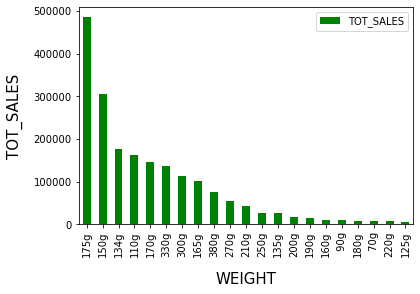

In [37]:
#relationship between purchases and weight
df_weightsales.plot.bar(x ="WEIGHT",y= "TOT_SALES", color = 'Green')
plt.xlabel("WEIGHT",fontsize=15,labelpad = 15)
plt.ylabel("TOT_SALES", fontsize =15,labelpad=10)
plt.rcParams['figure.figsize'] = (10,6)
plt.show()


In [38]:
#expenditure by lifestage
df_lifestage = df_custrans.groupby(by =['LIFESTAGE'], as_index=False)['TOT_SALES'].sum().sort_values(by ='TOT_SALES',ascending = False)

In [39]:
df_lifestage

,LIFESTAGE,TOT_SALES
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90
2,OLDER FAMILIES,353767.20
5,YOUNG FAMILIES,316160.10
6,YOUNG SINGLES/COUPLES,260405.30
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45


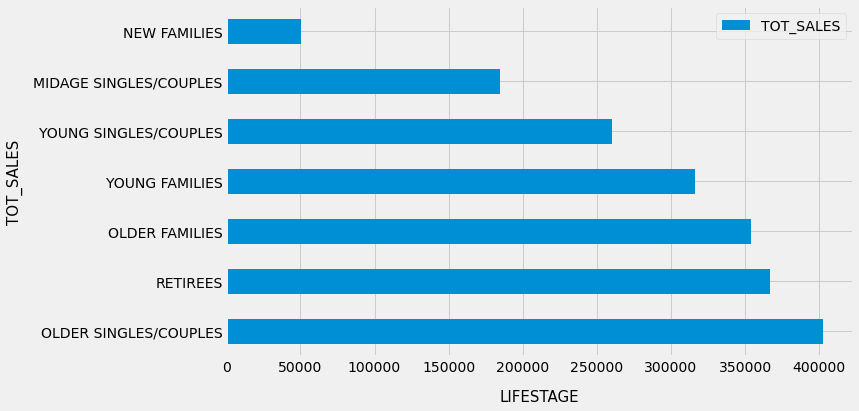

In [40]:
plt.style.use("fivethirtyeight")
#plt.figure(figsize=(100,40))
df_lifestage.plot.barh(x ="LIFESTAGE",y= "TOT_SALES")
plt.xlabel("LIFESTAGE",fontsize=15,labelpad = 15)
plt.ylabel("TOT_SALES", fontsize =15,labelpad=10)
plt.show()



In [41]:
#Buying patterns of different customers
df_custype = df_custrans.groupby(by =['PREMIUM_CUSTOMER'], as_index=False)['TOT_SALES'].sum().sort_values(by ='TOT_SALES',ascending = False)

In [42]:
#df_custype.set_index('PREMIUM_CUSTOMER', inplace=True)
df_custype

,PREMIUM_CUSTOMER,TOT_SALES
1,Mainstream,750744.50
0,Budget,676211.55
2,Premium,507458.95


Text(0, 0.5, '')

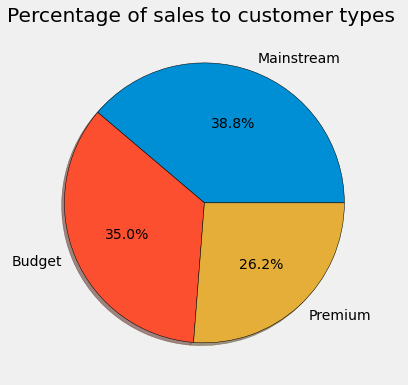

In [43]:
plt.style.use("fivethirtyeight")
plt.title("Percentage of sales to customer types ")
df_custype.set_index("PREMIUM_CUSTOMER")["TOT_SALES"].plot.pie(autopct='%1.1f%%',wedgeprops ={'edgecolor':'black'},shadow =True)
plt.ylabel(None)

In [44]:
df_custpurchases= df_custrans.groupby(by =['LYLTY_CARD_NBR'], as_index=False)['PROD_QTY'].sum().sort_values(by ='PROD_QTY',ascending = False)

In [45]:
df_custrans["LYLTY_CARD_NBR"].count()

264836

In [46]:
df_custrans['PROD_QTY'].sum()

505124

In [47]:
#comparing chip purchases and customers
df_custrans["LYLTY_CARD_NBR"].count() > df_custrans['PROD_QTY'].sum()

False

In [48]:
# Create invoice month
import datetime as dt
#function for month
def get_month(x):
    return dt.datetime(x.year,x.month,1)
# apply the function
df_custrans['INV_MONTH']= df_custrans['DATE'].apply(get_month)
df_custrans.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,WEIGHT,PROD_QTY,TOT_SALES,INV_MONTH
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt,175g,2,6.00,2018-10-01
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli,150g,1,2.70,2018-09-01
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives,210g,1,3.60,2019-03-01
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn,175g,1,3.00,2019-03-01
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips,160g,1,1.90,2018-11-01


In [49]:
# create a  column index with the minimum invoice date
df_custrans['Cohort_Month'] = df_custrans.groupby('LYLTY_CARD_NBR')['INV_MONTH'].transform('min')
df_custrans.head(20)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,WEIGHT,PROD_QTY,TOT_SALES,INV_MONTH,Cohort_Month
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt,175g,2,6.00,2018-10-01,2018-10-01
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli,150g,1,2.70,2018-09-01,2018-09-01
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives,210g,1,3.60,2019-03-01,2019-03-01
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn,175g,1,3.00,2019-03-01,2019-03-01
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips,160g,1,1.90,2018-11-01,2018-11-01
5,1005,MIDAGE SINGLES/COUPLES,Mainstream,2018-12-28,1,6,86,Cheetos Puffs,165g,1,2.80,2018-12-01,2018-12-01
6,1007,YOUNG SINGLES/COUPLES,Budget,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws,110g,1,3.80,2018-12-01,2018-12-01
7,1007,YOUNG SINGLES/COUPLES,Budget,2018-12-05,1,8,10,RRD SR Slow Rst Pork Belly,150g,1,2.70,2018-12-01,2018-12-01
8,1009,NEW FAMILIES,Premium,2018-11-20,1,9,20,Doritos Cheese Supreme,330g,1,5.70,2018-11-01,2018-11-01
9,1010,YOUNG SINGLES/COUPLES,Mainstream,2018-09-09,1,10,51,Doritos Mexicana,170g,2,8.80,2018-09-01,2018-09-01
